# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [40]:
import pandas as pd
import os 

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [41]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [42]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [43]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [44]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


In [45]:
df_new = df_new.sort_values(by='electric_train.tm')
df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
2647991,2020-01-01 01:00:00,1,2,0,63850,39,9732.96,250.490543,99.63,13615,140,-8.5,74.5,0.9,0.0,-5.8
5208382,2020-01-01 01:00:00,1,2,0,14750,20,2401.12,116.010234,103.49,18235,565,-8.8,25.6,1.9,0.0,-4.6
5182078,2020-01-01 01:00:00,1,2,0,71630,32,12139.16,363.252769,104.43,18234,565,-8.8,25.6,1.9,0.0,-4.6
5155774,2020-01-01 01:00:00,1,2,0,45840,28,6723.84,225.924357,106.29,18233,512,-6.3,31.3,2.5,0.0,-7.8
1280137,2020-01-01 01:00:00,1,2,0,76450,44,12949.24,287.250770,102.45,11272,941,2.4,68.0,1.2,0.0,-5.3


In [46]:
aws_spots = sorted(df_new['electric_train.stn'].unique().tolist())
aws_spots[:10]

[98, 99, 101, 104, 106, 108, 112, 114, 119, 127]

In [47]:
print(len(aws_spots))

185


### AWS 기반으로 구역을 만들어도 되겠는데?

### 지역을 먼저 나눠보자 

In [48]:
df_new['electric_train.num'].value_counts()
# 8760개씩 또는 26304씩 데이터가 들어있음 

electric_train.num
13615    26304
18533    26304
18684    26304
18537    26304
18530    26304
         ...  
13648     8760
15849     8760
14258     8760
14378     8760
13360     8760
Name: count, Length: 323, dtype: int64

In [49]:
spots_num = sorted(df_new['electric_train.num'].unique().tolist())
print(len(spots_num))
spots_num[:10]

323


[4821, 5565, 5566, 5567, 8994, 9609, 9735, 9736, 9758, 9759]

In [66]:
df_0 = df_new[df_new['electric_train.num']==spots_num[0]]

In [52]:
# 2020년 데이터가 없다
df_0.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


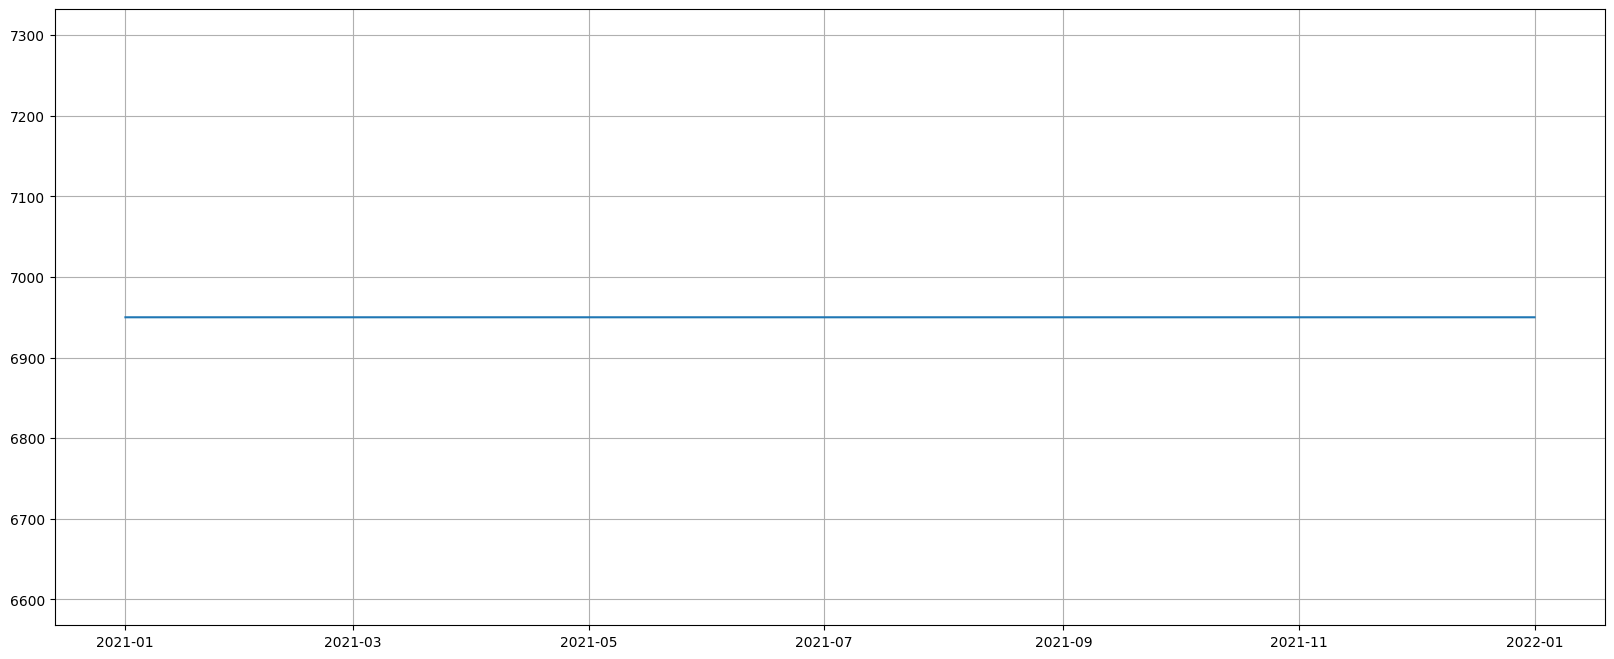

In [56]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_qctr', data = df_0)
plt.grid()
plt.show()

In [59]:
df_1 = df_new[df_new['electric_train.num']==spots_num[1]]

df_1['electric_train.tm'].min(), df_1['electric_train.tm'].max()

(Timestamp('2020-01-01 01:00:00'), Timestamp('2023-01-01 00:00:00'))

In [67]:
df_0['electric_train.tm'].min(), df_0['electric_train.tm'].max()

(Timestamp('2021-01-01 01:00:00'), Timestamp('2022-01-01 00:00:00'))

In [63]:
str(df_1['electric_train.tm'].min())

'2020-01-01 01:00:00'

In [69]:
str(df_1['electric_train.tm'].min())

'2020-01-01 01:00:00'

In [71]:
df_new[df_new['electric_train.num']==spots_num[0]]['electric_train.tm'].min()

Timestamp('2021-01-01 01:00:00')

In [73]:
no_2020 = []
yes_2020 = []
for i in range(len(spots_num)):
    a = str(df_new[df_new['electric_train.num']==spots_num[i]]['electric_train.tm'].min())
    b = str(df_1['electric_train.tm'].min())

    if a != b:
        no_2020.append(spots_num[i])
    else:
        yes_2020.append(spots_num[i])
        
print(len(no_2020))  # 2020년도 데이터가 없는 격자 지역 개수 
print(len(yes_2020)) # 2020년도 데이터가 있는 격자 지역 개수 

23
300


In [75]:
print(no_2020)

[4821, 8994, 9609, 10224, 10975, 10976, 11119, 11271, 11376, 11562, 12322, 12467, 12618, 12619, 13202, 13360, 13648, 14258, 14378, 15849, 16900, 16913, 18828]
